In [2]:
%matplotlib inline
import pandas as pd
import collections
import itertools
import math
import random
import warnings
import time
warnings.filterwarnings('ignore')

In [3]:
data = [
    ["Spanish", "Barcelona", "Spain"],
    ["La Liga", "Madrid", "Spain"],
    ["La Liga", "Madrid", "Spain"],
    ["La Liga", "Madrid", "Espana"],
    ["La Liga", "Madrid", "Spain"]
]

df = pd.DataFrame(data, columns=["Team", "League", "City", "Country"])

AssertionError: 4 columns passed, passed data had 3 columns

In [ ]:
# data = [
#     ["birmingham", "jefferson"],
#     ["sheffield", "jefferson"],
#     ["sheffield", "jefferson"],
#     ["birmixgham", "jefferson"],
#     ["birmingham", "jefferson"],
#     ["sheffield", "jeffxrson"],
#     ["sheffield", "jefferson"],
#     ["sheffield", "jefferson"],
#     ["birmingham", "jefferson"],
# ]

# df = pd.DataFrame(data, columns=["City", "County"])

In [117]:
df

,League,City,Country
0,Spanish,Barcelona,Spain
1,La Liga,Madrid,Spain
2,La Liga,Madrid,Spain
3,La Liga,Madrid,Espana
4,La Liga,Madrid,Spain


In [118]:
constraints = [1, 2, 3]

In [125]:
def algo(df, constraints):
    df_c = df.copy()
    if 1 in constraints:
        for i, r in df_c.iterrows():
            if r.Team != "NULL" and r.City != "NULL":
                errors = df_c[(df_c.Team == r.Team) & (df_c.City != r.City) & (df_c.City != "NULL")]
                if errors.shape[0] > 0:
                    c = collections.Counter(df_c[df_c.Team == r.Team].City)
                    if "NULL" in c:
                        c.pop("NULL")
                    if len(c) > 0:
                        if c.most_common(1)[0][1] > 1:
                            df_c["City"][i] = c.most_common(1)[0][0] 

    if 2 in constraints:
        for i, r in df_c.iterrows():
            if r.League != "NULL" and r.Country != "NULL":
                errors = df_c[(df_c.League == r.League) & (df_c.Country != r.Country) & (df_c.Country != "NULL")]
                if errors.shape[0] > 0:
                    c = collections.Counter(df_c[df_c.League == r.League].Country)
                    if "NULL" in c:
                        c.pop("NULL")
                    if len(c) > 0:
                        if c.most_common(1)[0][1] > 1:
                            df_c["Country"][i] = c.most_common(1)[0][0]
                                   
                        
    if 3 in constraints:
        for i, r in df_c.iterrows():
            if r.City != "NULL" and r.Country != "NULL":
                errors = df_c[(df_c.City == r.City) & (df_c.Country != r.Country) & (df_c.Country != "NULL")]
                if errors.shape[0] > 0:
                    c = collections.Counter(df_c[df_c.City == r.City].Country)
                    if "NULL" in c:
                        c.pop("NULL")
                    if len(c) > 0:
                        if c.most_common(1)[0][1] > 1:
                            df_c["Country"][i] = c.most_common(1)[0][0]


    
    return df_c

In [126]:
algo(df, [1, 2, 3])

,League,City,Country
0,Spanish,Barcelona,Spain
1,La Liga,Madrid,Spain
2,La Liga,Madrid,Spain
3,La Liga,Madrid,Spain
4,La Liga,Madrid,Spain


In [127]:
df

,League,City,Country
0,Spanish,Barcelona,Spain
1,La Liga,Madrid,Spain
2,La Liga,Madrid,Spain
3,La Liga,Madrid,Espana
4,La Liga,Madrid,Spain


In [128]:
import time
df = df
constraints = [1, 2, 3]
df_copy = df.copy()
cells = list(itertools.product(df.index, list(df_copy.columns)))

start = time.time()

results_shapp = {}
for i in range(len(cells) + 1):
    for comb in itertools.combinations(cells, i):
        df_c2 = df_copy.copy()
        for cell in cells:
            if cell not in comb:
                df_c2[cell[1]][cell[0]] = "NULL"
        df_repair = algo(df_c2, constraints)
        results_shapp[tuple(sorted(comb))] = int(df_repair["Country"][3]=="Spain")
    print("Done with len " + str(i))
print(time.time() - start)

Done with len 0
Done with len 1
Done with len 2
Done with len 3
Done with len 4
Done with len 5
Done with len 6
Done with len 7
Done with len 8
Done with len 9
Done with len 10
Done with len 11
Done with len 12
Done with len 13
Done with len 14
Done with len 15
218.77981305122375


In [ ]:
import time
# df = df
# constraints = [1, 2, 3]

df = pd.read_csv('./testdata/La_Liga.csv')
constraints_path = './testdata/La_liga_constraints.txt'


df_copy = df.copy()
cells = list(itertools.product(df.index, list(df_copy.columns)))

start = time.time()

results_shapp = {}
for i in range(len(cells) + 1):
    for comb in itertools.combinations(cells, i):
        df_c2 = df_copy.copy()
        for cell in cells:
            if cell not in comb:
                df_c2[cell[1]][cell[0]] = "NULL"
        df_repair = algo(df_c2, constraints)
        results_shapp[tuple(sorted(comb))] = int(df_repair["Country"][0]=="Spain")
    print("Done with len " + str(i))
print(time.time() - start)

In [129]:
cells = list(itertools.product(df.index, list(df.columns)))
# cells.remove((0, 'Country'))

for cell_i in cells:
    shapley_value = 0
    for comb in results_shapp:
        if cell_i not in comb:
            comb_i = tuple(sorted(tuple((comb + (cell_i,)))))
            factor = math.factorial(len(comb)) * math.factorial(len(cells) - len(comb) - 1)
            factor /= math.factorial(len(cells))
            if results_shapp[comb_i] and not results_shapp[comb]:
                shapley_value += factor*(results_shapp[comb_i] - results_shapp[comb])
    print(cell_i, shapley_value * 10000)    

(0, 'League') 0
(0, 'City') 0
(0, 'Country') 0
(1, 'League') 368.6868686868661
(1, 'City') 368.6868686868661
(1, 'Country') 1020.2020202020149
(2, 'League') 368.6868686868661
(2, 'City') 368.6868686868661
(2, 'Country') 1020.2020202020149
(3, 'League') 742.4242424242376
(3, 'City') 742.4242424242376
(3, 'Country') 3242.424242424254
(4, 'League') 368.6868686868661
(4, 'City') 368.6868686868661
(4, 'Country') 1020.2020202020149


In [124]:
df

,League,City,Country
0,Spanish,Barcelona,Spain
1,La Liga,Madrid,Spain
2,La Liga,Madrid,Spain
3,La Liga,Madrid,Espana
4,La Liga,Madrid,Spain


In [41]:
cells

[(0, 'League'),
 (0, 'City'),
 (0, 'Country'),
 (1, 'League'),
 (1, 'City'),
 (1, 'Country'),
 (2, 'League'),
 (2, 'City'),
 (2, 'Country'),
 (3, 'League'),
 (3, 'City'),
 (3, 'Country'),
 (4, 'League'),
 (4, 'City'),
 (4, 'Country'),
 (5, 'League'),
 (5, 'City'),
 (5, 'Country')]

No handles with labels found to put in legend.


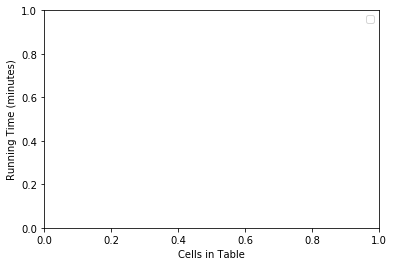

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.plot([220, 2000, 5500, 12100, 55000, 121000, 537262], [1.9/60, 2.5/60, 14.4/60, 21.5/60, 44.2/60, 64/60, 233/60], label='Adult')
# plt.plot([220, 2000, 5500, 12100], [43.5/3600, 1465/3600, 10535/3600, 50211/3600], label='Adult', color='orange')


plt.xlabel('Cells in Table')
plt.ylabel('Running Time (minutes)')
plt.legend()
plt.show()

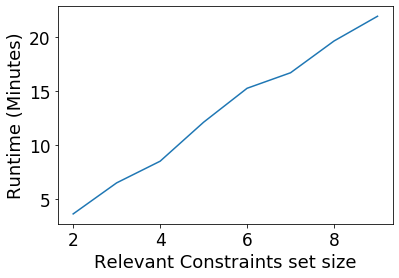

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot([2, 3, 4, 5, 6, 7, 8, 9], [220/60 ,392/60 ,512/60 ,728/60 ,916/60 ,1002/60 ,1178/60 ,1315/60])
plt.xlabel('Relevant Constraints set size', size=18)
plt.ylabel('Runtime (Minutes)', size=18)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.tick_params(axis='x', which='major', labelsize=17)
plt.show()

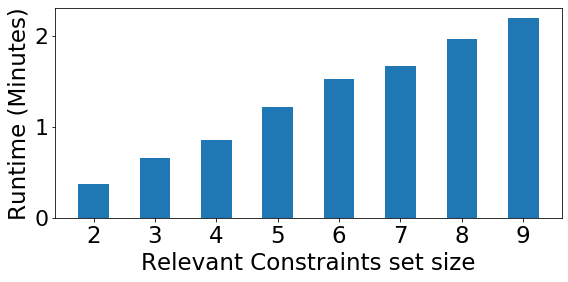

In [47]:
import numpy as np
labels = [2, 3, 4, 5, 6, 7, 8, 9]
trexc = [220/600 ,392/600 ,512/600 ,728/600 ,916/600 ,1002/600 ,1178/600 ,1315/600]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(8,4))
rects1 = ax.bar(x, trexc, width, label='TREx')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runtime (Minutes)', size=23)

ax.set_xticks(x)
plt.xlabel('Relevant Constraints set size', size=23)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', which='major', labelsize=22)
ax.tick_params(axis='x', which='major', labelsize=23)
fig.tight_layout()
plt.show()

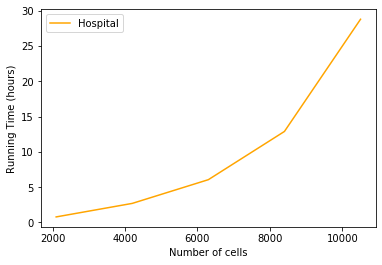

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([2100, 4200, 6300, 8400, 10500], [28280/36000 ,97230/36000 ,218190/36000, 464156/36000 ,1036350/36000], label='Hospital', color='orange')
# plt.plot([2100, 10500, 21000, 105000], [268/36000 ,10170/36000 ,22020/36000 ,152630/36000], label='Hospital')

plt.xlabel('Number of cells')
plt.ylabel('Running Time (hours)')
plt.legend()
plt.show()

In [85]:
22020*5

110100

In [89]:
14805*70/36000

28.7875

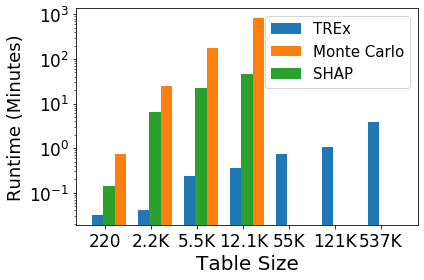

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ["220", "2.2K", "5.5K", "12.1K", "55K", "121K", "537K"]
trex = [1.9/60, 2.5/60, 14.4/60, 21.5/60, 44.2/60, 64/60, 233/60]
slovenian = [43.5/60, 1465/60, 10535/60, 50211/60, 0, 0, 0]
SHAP = [8.5/60, 385/60, 1315/60, 2810/60, 0, 0, 0]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width/3, trex, width, label='TREx')
rects2 = ax.bar(x + 4* width/3, slovenian, width, label='Monte Carlo')
rects2 = ax.bar(x + width/3, SHAP, width, label='SHAP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runtime (Minutes)', size=18)

ax.set_xticks(x)
plt.yscale("log")
plt.xlabel('Table Size', size=20)
ax.set_xticklabels(labels)
ax.legend()
ax.tick_params(axis='y', which='major', labelsize=17)
ax.tick_params(axis='x', which='major', labelsize=17)

fig.tight_layout()
ax.legend(prop={'size': 15})

plt.show()

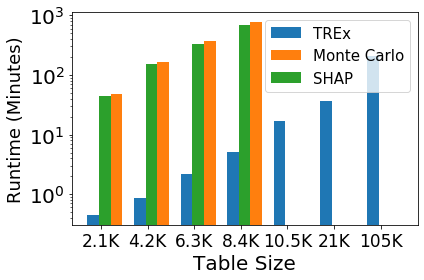

In [74]:
labels = ["2.1K", "4.2K", "6.3K", "8.4K", "10.5K", "21K", "105K"]
trex = [268/600 ,518/600, 1288/600, 3018/600, 10170/600 ,22020/600 ,122630/600]
slovenian = [28280/600 ,97230/600 ,218190/600, 464156/600 ,0, 0, 0]
SHAP = [2655/60, 1.5*6021/60, 1.5*13125/60, 2.5*16450/60, 0, 0, 0]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width/3, trex, width, label='TREx')
rects2 = ax.bar(x + 4* width/3, slovenian, width, label='Monte Carlo')
rects3 = ax.bar(x + width/3, SHAP, width, label='SHAP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
plt.yscale("log")
plt.xlabel('Table Size', size=20)
ax.set_ylabel('Runtime (Minutes)', size=18)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 15})
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=17)
fig.tight_layout()
plt.show()

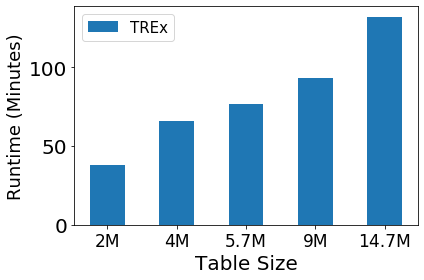

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ["2M", "4M", "5.7M", "9M", "14.7M"]
trex = [38.2, 66 ,76.8, 93.2, 132]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, trex, width, label='TREx')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
# plt.yscale("log")
plt.xlabel('Table Size', size=20)
ax.set_ylabel('Runtime (Minutes)', size=18)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 15})
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=17)
fig.tight_layout()
plt.show()

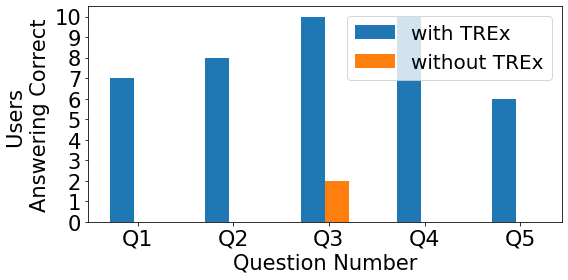

In [48]:
labels = ["Q1", "Q2", "Q3", "Q4", "Q5"]
trex = [7,8,10,10,6]
SHAP = [0,0,2,0,0]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8,4))
rects1 = ax.bar(x - 2*width/3, trex, width, label='with TREx')
rects3 = ax.bar(x + width/3, SHAP, width, label='without TREx')

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
plt.xlabel('Question Number', size=21)
ax.set_ylabel('Users \nAnswering Correct', size=21)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 20})
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.tick_params(axis='y', which='major', labelsize=21)
ax.tick_params(axis='x', which='major', labelsize=22)
fig.tight_layout()
plt.show()